In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import matplotlib as mpl

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Opening the file
**This file does not open directly as we use the function .read_csv from pandas, so i'm gonna use chardet to try to detect which kind of encoding we have**

In [2]:
with open('archive/DisneylandReviews.csv','rb') as raw:
    res = chardet.detect(raw.read(1000000))
res

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

After detecting that the file is on 'ISO-8859-1' we can use it as encoding

In [3]:
dfRaw = pd.read_csv('archive/DisneylandReviews.csv', encoding='ISO-8859-1')
dfRaw.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
dfRaw.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [5]:
dfRaw.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [6]:
dfRaw['Year_Month'].value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64

In [7]:
dfRaw.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


In [8]:
dfWork = dfRaw.copy()

As we can see there is a lot of missing data on the 'Year_Month' column and there is few options to try to impu these missing data.
We could try:
1. Backfilling => this sounds like a resonable option as most of the data in this column is sequential, although there are exceptions it seems a good option
The information will not be 100% accurate with this method but it`s anyway better than dropping the NA values

In [9]:
dfWork['Year_Month'].value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64

In [10]:
dfWork['Year_Month'].replace({'missing':np.nan}, inplace=True)
dfWork['Year_Month'] = pd.to_datetime(dfWork['Year_Month'].fillna(method='ffill'))
dfWork['Year_Month'].value_counts()

2015-08-01    786
2010-12-01    770
2015-07-01    760
2015-05-01    704
2015-12-01    701
             ... 
2010-08-01      7
2010-05-01      4
2019-05-01      2
2010-03-01      2
2010-04-01      1
Name: Year_Month, Length: 111, dtype: int64

In [11]:
print(dfWork['Reviewer_Location'].nunique())
dfWork['Reviewer_Location'].value_counts()


162


United States     14551
United Kingdom     9751
Australia          4679
Canada             2235
India              1511
                  ...  
Namibia               1
Armenia               1
Timor-Leste           1
South Sudan           1
Åland Islands         1
Name: Reviewer_Location, Length: 162, dtype: int64

In [12]:
dfWork['Branch'].value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

In [13]:
dfWork.head(), dfWork.tail()

(   Review_ID  Rating Year_Month     Reviewer_Location  \
 0  670772142       4 2019-04-01             Australia   
 1  670682799       4 2019-05-01           Philippines   
 2  670623270       4 2019-04-01  United Arab Emirates   
 3  670607911       4 2019-04-01             Australia   
 4  670607296       4 2019-04-01        United Kingdom   
 
                                          Review_Text               Branch  
 0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
 1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
 2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
 3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
 4  the location is not in the city, took around 1...  Disneyland_HongKong  ,
        Review_ID  Rating Year_Month Reviewer_Location  \
 42651    1765031       5 2010-09-01    United Kingdom   
 42652    1659553       5 2010-09-01            Canada   
 42653    164

In [30]:
dfWork['Year'] = dfWork['Year_Month'].dt.year

# Now we can stablish some questions to be answered by our explanatory analysis 
**1. How does the customer Rating has evolved over the years?** <br>
**2. What is the average Rating by Reviewer_Location** <br>
**3. Average Rating by Branch**<br>
**4. Group Ratings by branch and year** <br>

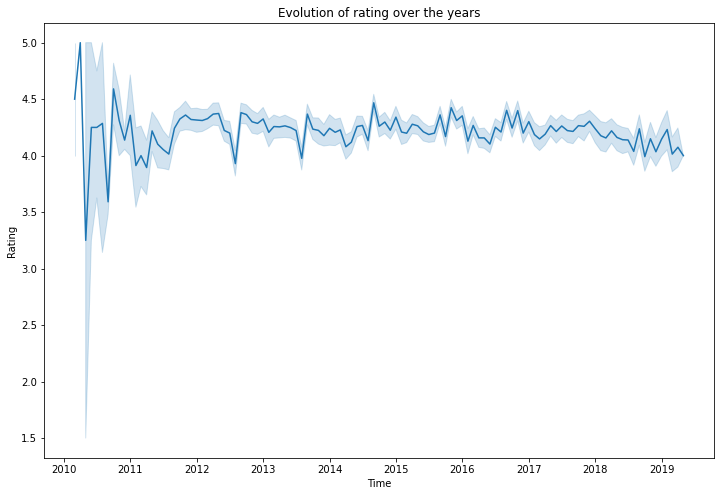

In [14]:
plt.figure(figsize=(12,8))
sns.lineplot(x = 'Year_Month', y = 'Rating', data=dfWork)
plt.title('Evolution of rating over the years')
plt.ylabel('Rating')
plt.xlabel('Time')
plt.show();

From the graphic above we can easily see that the rating usually stays between 4.. 5 with a small drop around the first quarter of 2010

# What is the average Rating by Reviewer_Location
There is actually more than 160 Reviewer locations in the list so i`ll focus on those locations with more than 200 evaluations as they represent most of the data <br>
However we can always do the analysis differently 

In [15]:
dfRevLocCount = pd.DataFrame(dfWork['Reviewer_Location'].value_counts())
placesMore200Reviews =  dfRevLocCount[dfRevLocCount['Reviewer_Location']> 200].index.values
placesMore200Reviews

array(['United States', 'United Kingdom', 'Australia', 'Canada', 'India',
       'Philippines', 'Singapore', 'New Zealand', 'Malaysia', 'Hong Kong',
       'Indonesia', 'Ireland', 'United Arab Emirates', 'Netherlands',
       'France', 'South Africa', 'Thailand'], dtype=object)

In [16]:
dfRevLocCount

,Reviewer_Location
United States,14551
United Kingdom,9751
Australia,4679
Canada,2235
India,1511
...,...
Namibia,1
Armenia,1
Timor-Leste,1
South Sudan,1


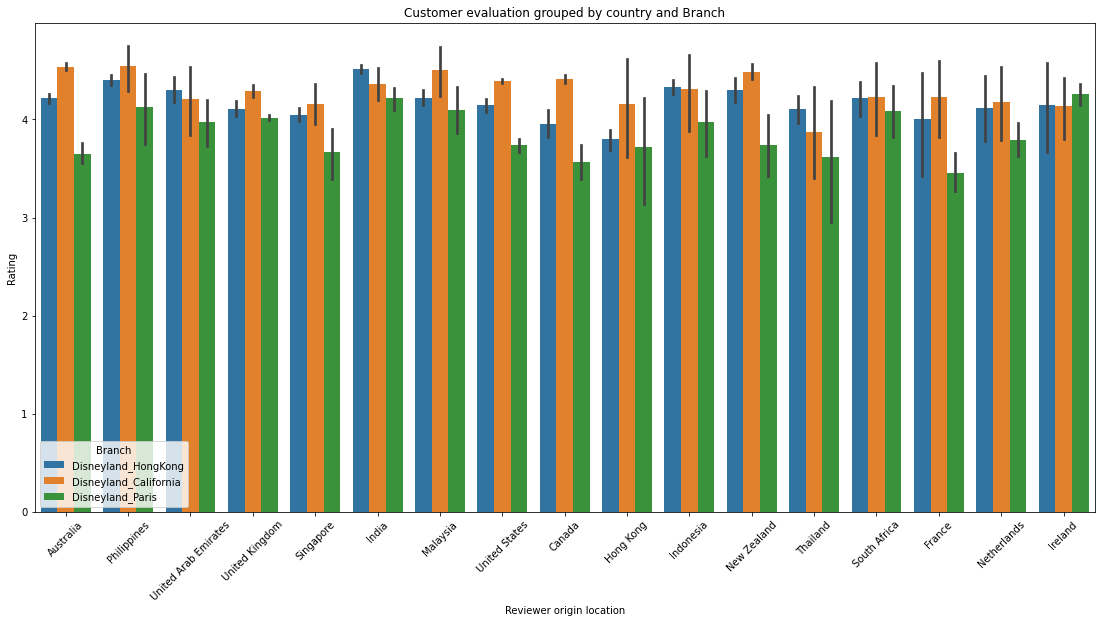

In [17]:
dfLimitedPlaces = dfWork[dfWork['Reviewer_Location'].isin(placesMore200Reviews)]
plt.figure(figsize = (19,9))
plt.title('Customer evaluation grouped by country and Branch')
sns.barplot(x = 'Reviewer_Location', y = 'Rating', data = dfLimitedPlaces, hue = 'Branch')
plt.xlabel('Reviewer origin location')
plt.xticks(rotation = 45)
plt.show()

Given the graphic above as well as the following table it seems like the branch from Paris seems to have lower ratings apart from the Irish public <br>
which in average rates Disney Paris with a higher grade <br>
This graphic should not to blindly analyzed as it doesn`t analyze the size of the sample used to calculate these measures <br>
For example : we can see that the public comming from India rates Disney Hong Kong better than the other 2, however it makes more sense for them to visit Disney Hong Kong <br>
as it is much closer, the same effect can be seen in other Branches 

In [18]:
dfLimitedPlaces.groupby(['Branch','Reviewer_Location']).mean()['Rating'].reset_index().pivot_table(columns = 'Branch',index='Reviewer_Location', values = 'Rating')

Branch,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
Reviewer_Location,,,
Australia,4.538807,4.213325,3.648739
Canada,4.412052,3.951220,3.569149
France,4.227273,4.000000,3.455000
Hong Kong,4.153846,3.796964,3.714286
India,4.362963,4.511542,4.215017
Indonesia,4.307692,4.332623,3.971429
Ireland,4.138889,4.142857,4.260465
Malaysia,4.500000,4.220907,4.098039
Netherlands,4.176471,4.111111,3.792350


# Average Rating by Branch over the years

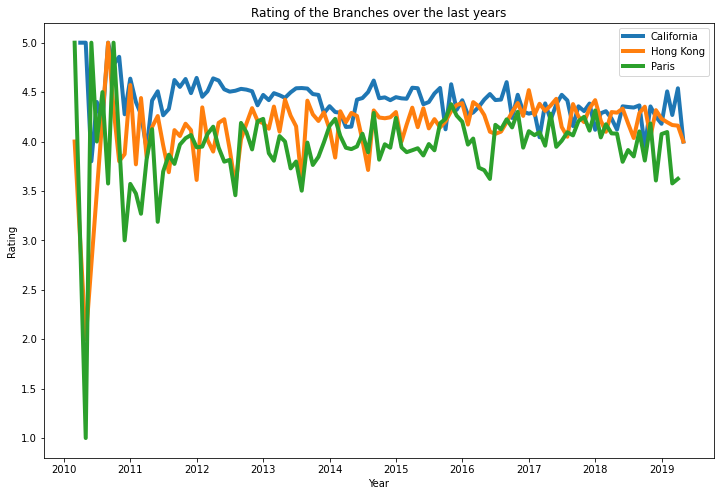

In [19]:
dfRatingCalifornia = dfLimitedPlaces[dfLimitedPlaces['Branch'] == 'Disneyland_California'].groupby('Year_Month').mean()['Rating']
dfRatingHongKong = dfLimitedPlaces[dfLimitedPlaces['Branch'] == 'Disneyland_HongKong'].groupby('Year_Month').mean()['Rating']
dfRatingParis = dfLimitedPlaces[dfLimitedPlaces['Branch'] == 'Disneyland_Paris'].groupby('Year_Month').mean()['Rating']

plt.figure(figsize = (12,8))
plt.title("Rating of the Branches over the last years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.plot(dfRatingCalifornia, label = "California", linewidth = 4)
plt.plot(dfRatingHongKong, label = "Hong Kong", linewidth = 4)
plt.plot(dfRatingParis, label = "Paris", linewidth = 4);
plt.legend()
plt.show()

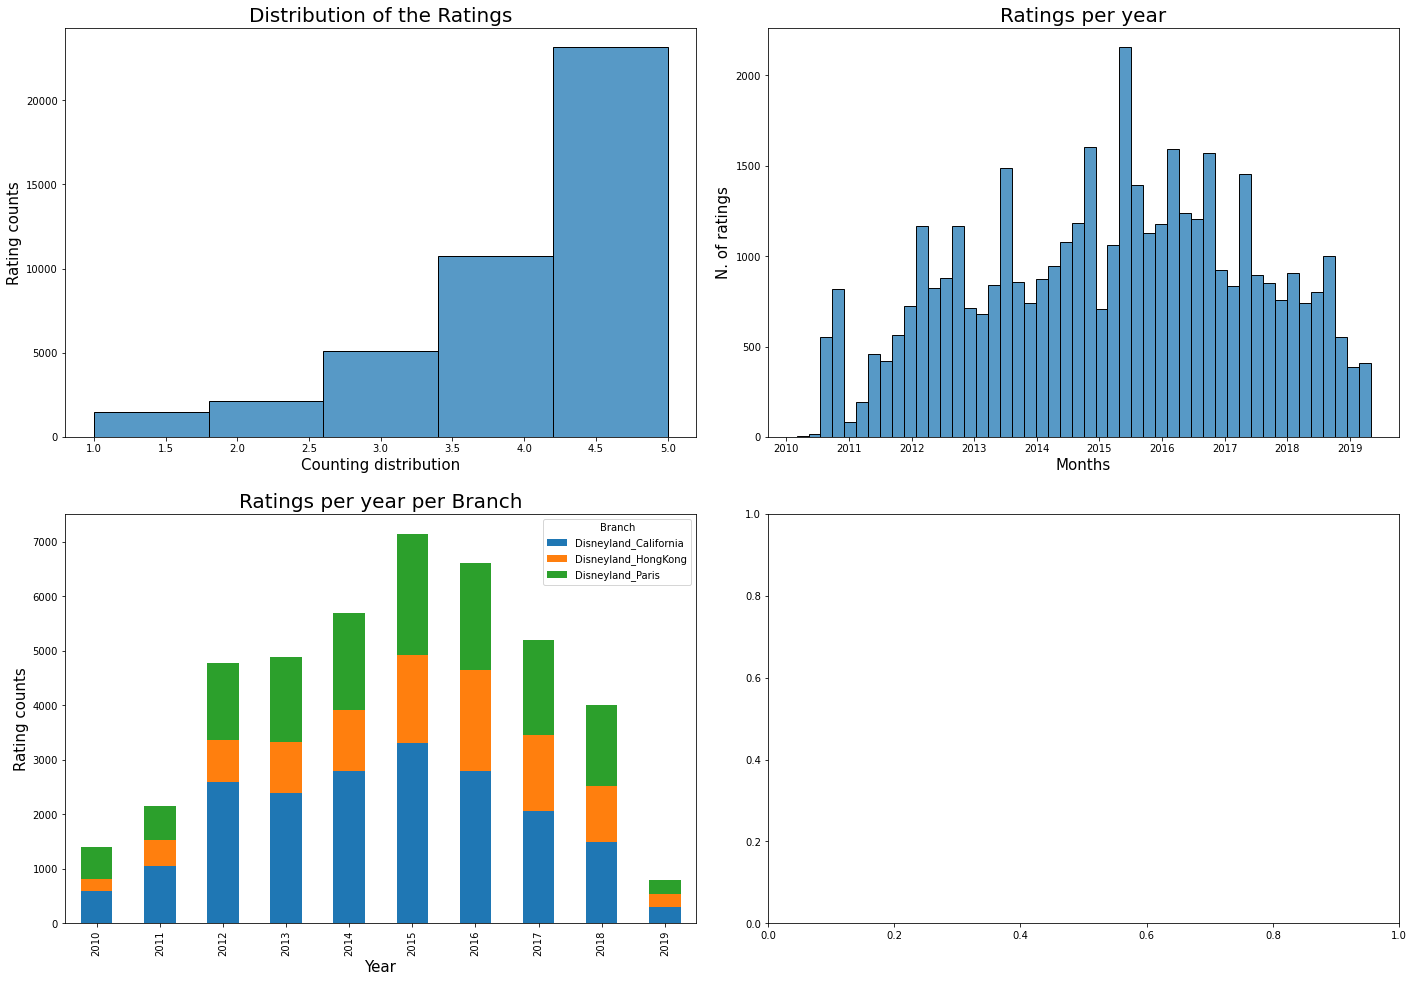

In [55]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize = (20,14))

titleFont = {'fontsize':20}
labelFont = {'fontsize':15}

ax[0,0].set_title('Distribution of the Ratings', fontdict = titleFont)
ax[0,0].set_ylabel('Rating counts', fontdict = labelFont)
ax[0,0].set_xlabel('Counting distribution', fontdict = labelFont)
sns.histplot(x = 'Rating', data =  dfWork, ax = ax[0,0], bins = 5)

ax[0,1].set_title('Ratings per year', fontdict = titleFont)
ax[0,1].set_ylabel('N. of ratings', fontdict = labelFont)
ax[0,1].set_xlabel('Months', fontdict = labelFont)
sns.histplot(x = 'Year_Month', data = dfWork, ax = ax[0,1])

ax[1,0].set_title('Ratings per year per Branch', fontdict = titleFont)
ax[1,0].set_ylabel('Rating counts', fontdict = labelFont)
ax[1,0].set_xlabel('Counting distribution', fontdict = labelFont)
df1 = dfWork.groupby(['Year','Branch'])['Rating'].count().reset_index()
df1.pivot_table(index = 'Year',columns='Branch', values = 'Rating').plot(kind = 'bar', stacked = True, ax = ax[1,0])


plt.tight_layout(pad = 2)
plt.show()

After doing a previous analysis i'm gonna try to predict the rating by using the text

In [81]:
vectorizer = TfidfVectorizer(encoding = 'ISO-8859-1', stop_words={'english'}, ngram_range=(1,2), max_features=5000)
vectorizer.fit(dfWork['Review_Text'])

TfidfVectorizer(encoding='ISO-8859-1', max_features=5000, ngram_range=(1, 2),
                stop_words={'english'})

In [82]:
vect = vectorizer.transform(dfWork['Review_Text'])
vect

<42656x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5002218 stored elements in Compressed Sparse Row format>

In [83]:
vect.toarray().shape

(42656, 5000)

In [79]:
dfWork.shape

(42656, 7)

In [84]:
X = vect.toarray()
y = dfWork['Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

modelRF= RandomForestClassifier(n_jobs = -1)
modelRF.fit(X_train, y_train)

predRF = modelRF.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test, predRF)}")
print(f"\nF1 score : {f1_score(y_test, predRF, average = 'micro')}")


Accuracy : 0 0.5652105962334922

F1 score : 0 0.5652105962334922
